# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import scipy.spatial.distance
import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm
from sklearn.manifold import TSNE

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 11 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [4]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.eps = kwargs['eps']
        self.min_pts = kwargs['min_pts']
        self.metric = kwargs['metric']
        return
       
    def _neighbors_in_eps(self, x, center):
        return self.distances[center] < self.eps
      
    def _expand_cluster(self, x, neighbors, cluster):
        neighbors_next = np.copy(neighbors)
        while True:
            for point in np.nonzero(neighbors)[0]:
                if self.label[point] > 0:
                    continue
                if self.label[point] == -1:
                    self.label[point] = cluster
                    continue
                self.label[point] = cluster
                new_neighbors = self._neighbors_in_eps(x, point)
                if np.count_nonzero(new_neighbors) - 1 >= self.min_pts:
                    neighbors_next[new_neighbors] = True
            if np.count_nonzero(neighbors_next != neighbors) == 0:
                break
            neighbors = np.copy(neighbors_next)
            
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.x_len = len(x)
        self.label = np.zeros(self.x_len, dtype=int)
        cluster = 0
        self.distances = scipy.spatial.distance.cdist(x, x, metric=self.metric)
        for point in xrange(self.x_len):
            if self.label[point] != 0:
                continue
            
            neighbors = self._neighbors_in_eps(x, point)
            if np.count_nonzero(neighbors) - 1 < self.min_pts:
                self.label[point] = -1
                continue
            cluster += 1
            self.label[point] = cluster
            self._expand_cluster(x, neighbors, cluster)
      
        return self
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.label
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

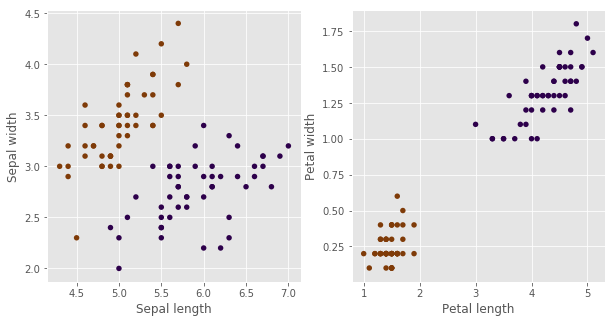

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [6]:
d = Clustering(eps=1, min_pts=2, metric='euclidean')

In [7]:
pred_iris = d.fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


In [8]:
%timeit d.fit(x_iris)

1000 loops, best of 3: 816 µs per loop


In [9]:
%timeit sc.DBSCAN(eps=1, min_samples=2, metric='euclidean').fit(x_iris)

The slowest run took 4.24 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 1.36 ms per loop


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

Для DBSCAN все 3 варианта критериев не очень подходят. Реализуем Silhouette:

In [10]:
## Задание 2
def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    s = np.array([])
    if y.max() <= 1:
        return -1
    for cluster in xrange(1, y.max()+1):
        a = scipy.spatial.distance.cdist(x[y == cluster], x[y == cluster], metric='euclidean').mean(axis=1)
        b = np.array([float('Inf') for i in range(np.count_nonzero(y == cluster))])
        for j in xrange(1, y.max()+1):
            if j != cluster:
                b_temp = scipy.spatial.distance.cdist(x[y == cluster], x[y == j], metric='euclidean').mean(axis=1)
                b[b_temp < b] = b_temp[b_temp < b]
        s = np.append(s, (b - a) / np.maximum(a, b))
    return s.mean()

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

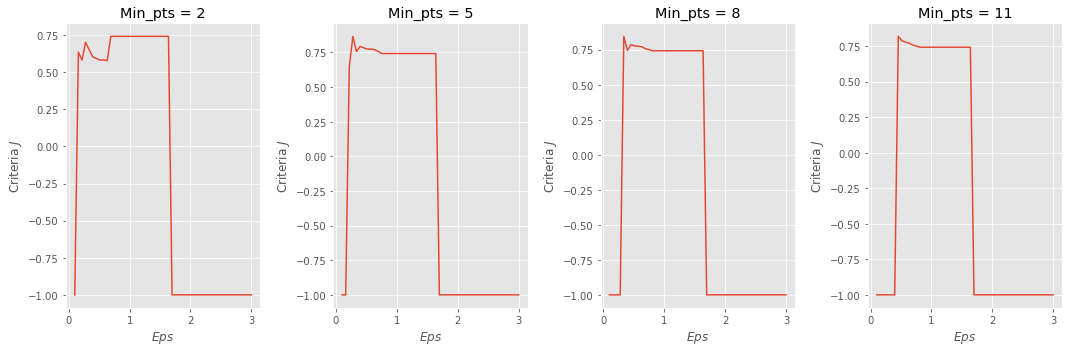

In [11]:
ks = np.linspace(0.1, 3, 50)
criteria = np.zeros(len(ks))
pl.figure(figsize=(15, 5))

for k in xrange(2, 12, 3):
    for i, eps in enumerate(ks):
        cls = Clustering(eps=eps, min_pts=k, metric='euclidean')
        y = cls.fit_predict(x_iris)
        criteria[i] = quality(x_iris, y)
    pl.subplot(1, 4, (k+1) // 3)
    pl.plot(ks, criteria)
    pl.ylabel("Criteria $J$")
    pl.xlabel("$Eps$")
    plt.title('Min_pts = {}'.format(k))
    
plt.tight_layout()

Видно, что выбранные значения $Eps$ = 1, min_pts = 2 являются одними из оптимальных для набора ирисов

In [12]:
## Задание 3
data = pd.read_csv('WDIData.csv')

In [13]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [14]:
countries_number = len(data.groupby('Country Name'))
features_number = data.shape[0] / countries_number
countries = np.array([i[0] for i in data.groupby('Country Name', sort=False)])
fixed_year = 2013

Приведём матрицу признаков к прямоугольному виду страна - признаки(индикаторы). Удалим столбцы в которых только nan и в которых стандартное отклонение равно 0. Заменим nan на нули.

In [15]:
x = np.copy(data[format(fixed_year)].values.reshape(countries_number, features_number))
i = 0
while i < x.shape[1]:
    if np.count_nonzero(np.isnan(x[:, i])) == countries_number or x[np.isnan(x[:, i]) == False, i].std() == 0:
        x = np.delete(x, i, 1)
        continue
    i += 1
features_number = x.shape[1]
for i in xrange(features_number):
    x[np.isnan(x[:, i]), i] = 0
    x[:, i] = (x[:, i] - x[:, i].mean()) / x[:, i].std()

Попробуем подобрать параметры:

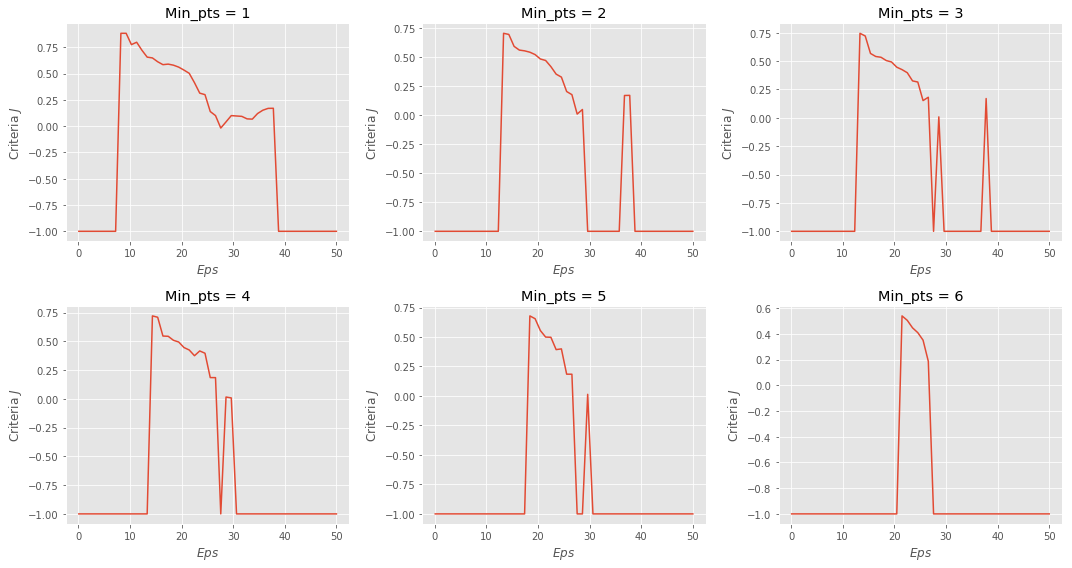

In [16]:
ks = np.linspace(0.1, 50, 50)
criteria = np.zeros(len(ks))
pl.figure(figsize=(15, 8))

for k in xrange(1, 7, 1):
    for i, eps in enumerate(ks):
        cls = Clustering(eps=eps, min_pts=k, metric='euclidean')
        y = cls.fit_predict(x)
        criteria[i] = quality(x, y)
    pl.subplot(2, 3, k)
    pl.plot(ks, criteria)
    pl.ylabel("Criteria $J$")
    pl.xlabel("$Eps$")
    plt.title('Min_pts = {}'.format(k))
    
plt.tight_layout()

In [17]:
mod = Clustering(eps=25, min_pts=2, metric='euclidean')

In [18]:
y = mod.fit_predict(x)

Получившиеся кластеры:

In [19]:
for i in xrange(1, y.max()+1):
    print 'cluster {}'.format(i), countries[y==i]

cluster 1 ['Arab World' 'Caribbean small states'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'IDA blend' 'IDA total'
 'Least developed countries: UN classification'
 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Africa (IDA & IBRD countries)' 'Other small states'
 'Pacific island small states' 'Pre-demographic dividend' 'Small states'
 'South Asia' 'South Asia (IDA & IBRD)' 'Sub-Saharan Africa'
 'Sub-Saharan Africa (IDA & IBRD countries)' 'Guyana' 'Nicaragua'
 'Papua New Guinea' 'Samoa' 'Tonga']
cluster 2 ['Central Europe and the Baltics'
 'Europe & Central Asia (IDA & IBRD countries)' 'Latin America & Caribbean'
 'Latin America & the Caribbean (IDA & IBRD countries)' 'Austria'
 'Bulgaria' 'Czech Republic' 'Denmark' 'Finland' 'France' 'Greece'
 'Hungary' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Macedonia, FYR' 'Norway'
 'Poland' 'Portugal' 'Serbia' 'Slovak Republic' 'Slovenia' 'Spain' 'S

In [20]:
x_tsne = TSNE(n_components=2).fit_transform(x)

Библиотечный t-sne работает очень нестабильно. При каждом новом запуске на тех же данных выдаёт результат, радикально отличающийся от предыдущего, близкие страны могут перейти в противоположные углы. Возможно, это связано с очень большим количеством признаков и маленькими значениями в них

In [21]:
import sys
reload(sys)
sys.setdefaultencoding('UTF8')

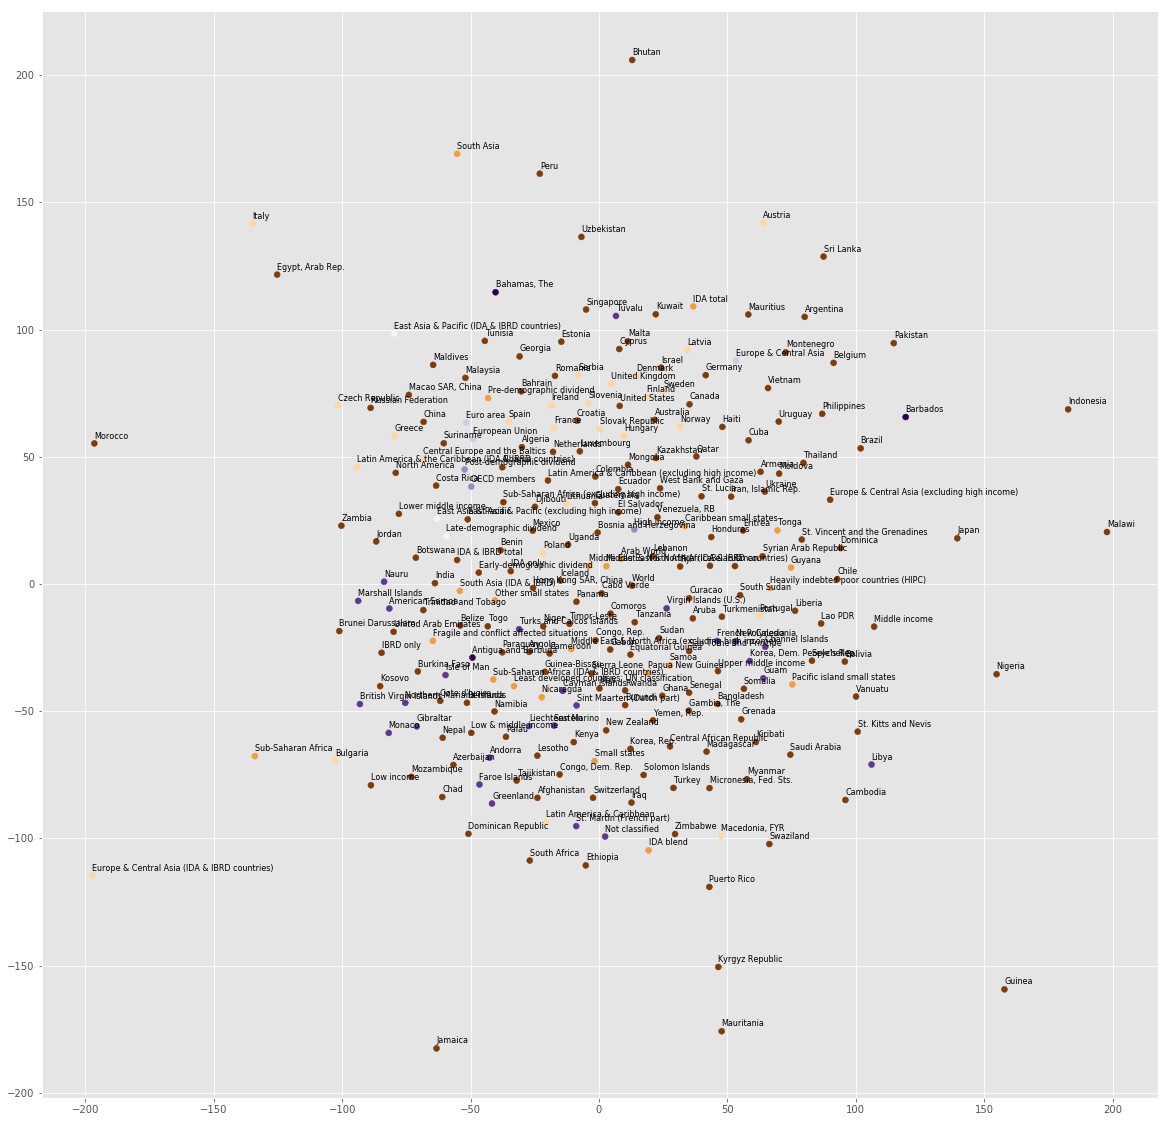

In [23]:
plt.figure(figsize=(20, 20))
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y, cmap=pl.cm.PuOr)
for i in xrange(countries_number):
    plt.annotate(str(countries[i]), xy=x_tsne[i], xytext=(0, 5), textcoords='offset points', fontsize=8)
plt.show()

## Задание 4
К сожалению, получилось много шумовых элементов. При попытках засунуть эти шумовые элементы в кластеры, получался один большой кластер превалирующий над всеми остальными.


Получилось выделить три более менее больших кластера: европейские страны, бедные страны, карликовые страны. И маленькие кластеры из 3 элементов, например ['Euro area' 'Europe & Central Asia' 'European Union']

Проблема заключалась также в замене многочисленных nan элементов в датасете. Замена на среднее по столбцу не давало приемлимых результатов, видимо потому что отсутствие значения всё-таки даёт какую-то информацию

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.